In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
import warnings

warnings.filterwarnings('ignore')

# Input File

In [3]:
Data_train=pd.read_csv('./titanic/train.csv')

Data_test=pd.read_csv('./titanic/test.csv')

Data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
Train_Survived=Data_train['Survived']

Data_train=Data_train.drop(['Survived'],axis=1)

In [5]:
AllData=pd.concat([Data_train,Data_test])

AllData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
AllData.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [7]:
AllData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


# Fill null values

In [8]:
AllData['Fare'].fillna(value=AllData['Fare'].mean(), inplace=True)
AllData['Cabin'].fillna("N",inplace=True)
AllData['Cabin']=AllData['Cabin'].apply(lambda x: x[0])
AllData.groupby('Cabin')['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.146674
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [9]:
def cabin_estimator(i):
    """Grouping cabin feature by the first letter"""
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a

DataCabinEqual_N=AllData[AllData['Cabin']=='N']
DataCabinNotEqual_N=AllData[AllData['Cabin']!='N']
DataCabinEqual_N['Cabin'] = DataCabinEqual_N['Fare'].apply(lambda x: cabin_estimator(x))

In [10]:
AllData=pd.concat([DataCabinEqual_N, DataCabinNotEqual_N],ignore_index=True)
AllData['Age']=AllData.groupby(['Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
AllData['Embarked'].fillna('S',inplace=True)
AllData.sort_values(by=['PassengerId'],inplace=True)
AllData.index=range(0,len(AllData))

In [11]:
Data_train=AllData[:891]
Data_train['Survived']=Train_Survived

In [12]:
Data_test=AllData[891:]
Data_test.index=range(len(Data_test))

In [13]:
Data_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,G,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,F,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C,1


In [14]:
Data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,G,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,G,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,G,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,G,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,G,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,G,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,G,S
416,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,G,S


# Features Engineering 

In [15]:
Data_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,G,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,F,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C,1


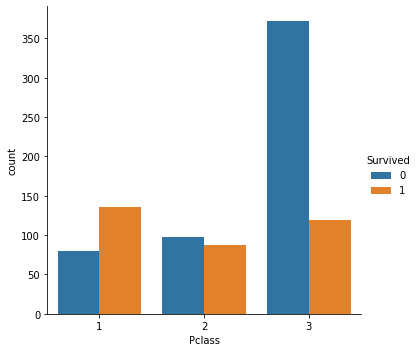

In [16]:
sns.catplot( x="Pclass", kind="count",hue='Survived', data=Data_train)

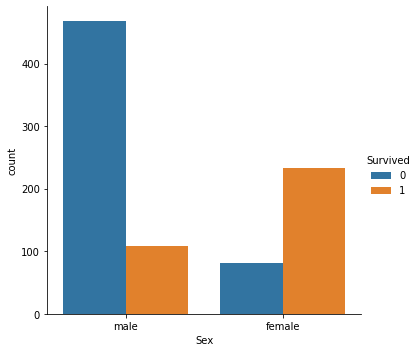

In [17]:
sns.catplot( x="Sex", kind="count",hue='Survived', data=Data_train)

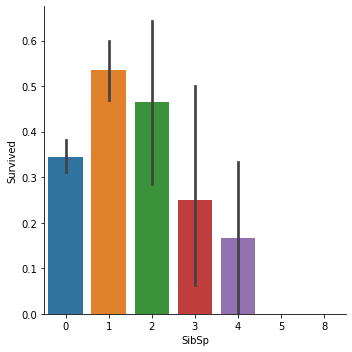

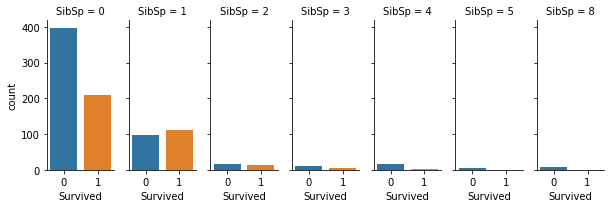

In [18]:
sns.catplot(y="Survived", x="SibSp",data=Data_train,kind="bar")
sns.catplot("Survived", col="SibSp",data=Data_train,kind="count",aspect=0.4,height=3)

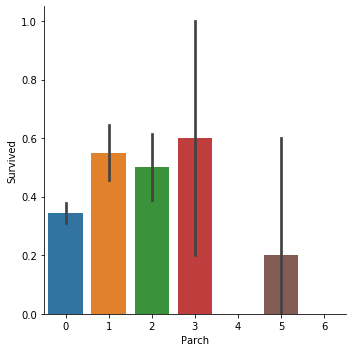

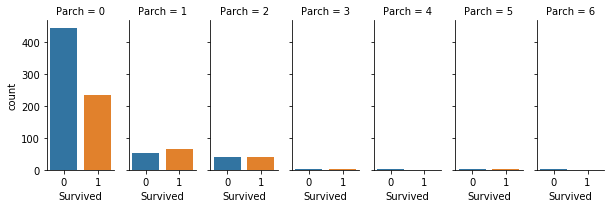

In [19]:
sns.catplot(y="Survived", x="Parch",data=Data_train,kind="bar")
sns.catplot("Survived", col="Parch",data=Data_train,kind="count",aspect=0.4,height=3)
#Parch 和 Sibsp 有類似的分布

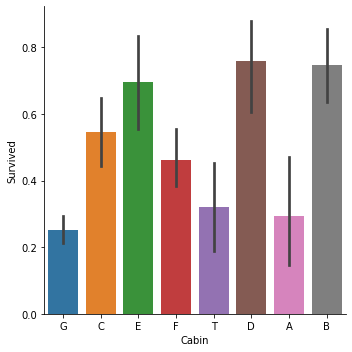

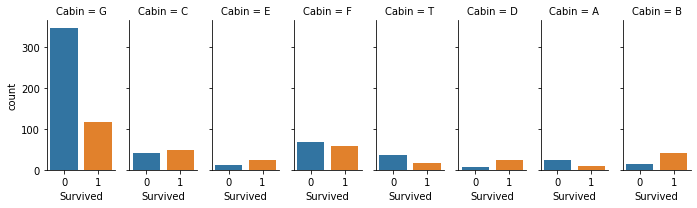

In [20]:
sns.catplot(y="Survived", x="Cabin",data=Data_train,kind="bar")
sns.catplot("Survived", col="Cabin",data=Data_train,kind="count",aspect=0.4,height=3)

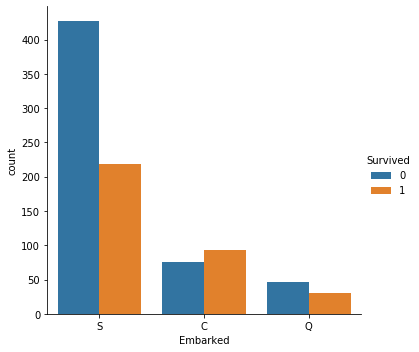

In [21]:
sns.catplot( x="Embarked", kind="count",hue='Survived', data=Data_train)

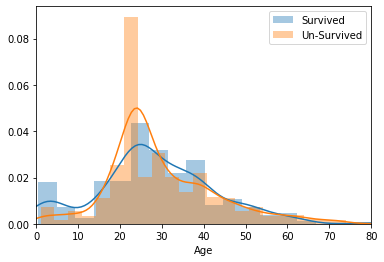

In [22]:
fig, ax = plt.subplots()
ax.set_xlim(0,80)
distplot = sns.distplot(Data_train[Data_train['Survived']==1]['Age'], label="Survived")
distplot = sns.distplot(Data_train[Data_train['Survived']==0]['Age'], label="Un-Survived")
plt.legend()

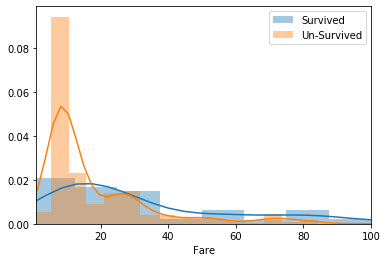

In [23]:
fig, ax = plt.subplots()
ax.set_xlim(1,100)
distplot = sns.distplot(Data_train[Data_train['Survived']==1]['Fare'], label="Survived")
distplot = sns.distplot(Data_train[Data_train['Survived']==0]['Fare'], label="Un-Survived")
plt.legend()

# SibSp是否為單身

In [24]:
Data_train['familyNum']=Data_train['SibSp']+Data_train['Parch']+1

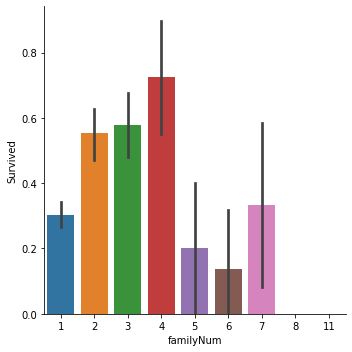

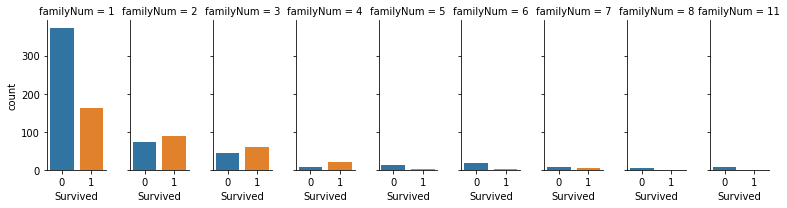

In [25]:
sns.catplot(y="Survived", x="familyNum",data=Data_train,kind="bar")
sns.catplot("Survived", col="familyNum",data=Data_train,kind="count",aspect=0.4,height=3)
#Parch 和 Sibsp 有類似的分布

In [26]:
Data_train['Single']=Data_train['familyNum'].apply(lambda x: 1 if x==True else 0)

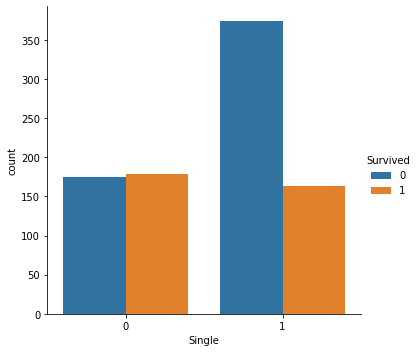

In [27]:
sns.catplot( x="Single", kind="count",hue='Survived', data=Data_train)

# Age轉變為類別資料

In [28]:
bins=[0,15, 30,40,100]
Data_train['Age_bin']=pd.cut(Data_train['Age'], bins)

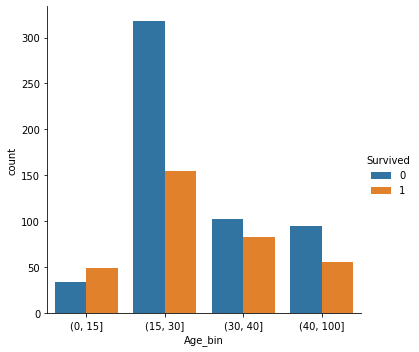

In [29]:
sns.catplot( x="Age_bin", kind="count",hue='Survived', data=Data_train)

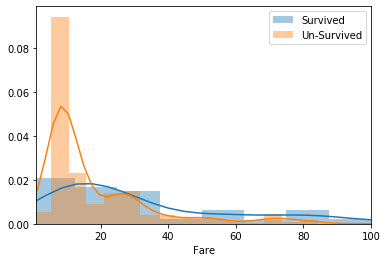

In [30]:
fig, ax = plt.subplots()
ax.set_xlim(1,100)
distplot = sns.distplot(Data_train[Data_train['Survived']==1]['Fare'], label="Survived")
distplot = sns.distplot(Data_train[Data_train['Survived']==0]['Fare'], label="Un-Survived")
plt.legend()

# Fare轉變為"Fare是否小於18"的類別

In [31]:
bins=[0,18,100]
Data_train['Fare_bin']=pd.cut(Data_train['Fare'], bins)

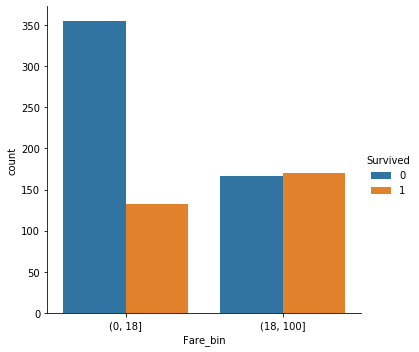

In [32]:
sns.catplot( x="Fare_bin", kind="count",hue='Survived', data=Data_train)

# Name轉變為title

In [33]:
Data_train['Name'][4].split( )[1]  

'Mr.'

In [34]:
def NameToTitle(x):
    return x.split()[1][:-1]

In [35]:
Data_train['Name'].apply(NameToTitle)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [36]:
Data_train['Title']=Data_train['Name'].apply(NameToTitle)

In [37]:
Data_train.groupby('Title')['Title'].count().sort_values()

Title
th               1
de               1
Messemaeker      1
Melkebeke        1
Velde            1
Pelsmaeker       1
Jonkheer         1
Shawah           1
Ms               1
Walle            1
Don              1
Cruyssen         1
Mulder           1
Carlo            1
Capt             1
Billiard         1
Steen            1
Mme              1
Major            2
Gordon           2
Col              2
Mlle             2
Impe             3
Planke           3
                 4
Rev              6
Dr               7
Master          40
Mrs            121
Miss           179
Mr             502
Name: Title, dtype: int64

In [38]:
titleMappingList=['Mr','Miss','Mrs','Master','Dr']
def titleMapping(x):
    if x not in titleMappingList:
        return 'Rare'
    else:
        return x

In [39]:
Data_train['Title']=Data_train['Title'].apply(titleMapping)

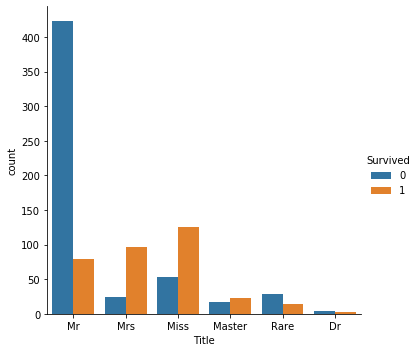

In [40]:
sns.catplot( x="Title", kind="count",hue='Survived', data=Data_train)

# All data apply the features changing

In [41]:
AllData

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,G,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,G,S
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,G,S


In [42]:
AllData['familyNum']=AllData['SibSp']+AllData['Parch']+1
AllData['Single']=AllData['familyNum'].apply(lambda x: 1 if x==True else 0)

In [43]:
bins=[0,15, 30,40,100]
AllData['Age_bin']=pd.cut(AllData['Age'], bins)

In [44]:
bins=[0,18,100,float('inf')]
AllData['Fare_bin']=pd.cut(AllData['Fare'], bins, include_lowest=True)

In [45]:
#對Title作處理
AllData['Name'].apply(NameToTitle)
AllData['Title']=AllData['Name'].apply(NameToTitle)
AllData['Title']=AllData['Title'].apply(titleMapping)

In [46]:
AllData

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familyNum,Single,Age_bin,Fare_bin,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G,S,2,0,"(15, 30]","(-0.001, 18.0]",Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,2,0,"(30, 40]","(18.0, 100.0]",Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G,S,1,1,"(15, 30]","(-0.001, 18.0]",Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,2,0,"(30, 40]","(18.0, 100.0]",Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G,S,1,1,"(30, 40]","(-0.001, 18.0]",Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,G,S,1,1,"(15, 30]","(-0.001, 18.0]",Mr
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,1,1,"(30, 40]","(100.0, inf]",Rare
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,G,S,1,1,"(30, 40]","(-0.001, 18.0]",Mr
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,G,S,1,1,"(15, 30]","(-0.001, 18.0]",Mr


In [47]:
AllData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
familyNum      1309 non-null int64
Single         1309 non-null int64
Age_bin        1309 non-null category
Fare_bin       1309 non-null category
Title          1309 non-null object
dtypes: category(2), float64(2), int64(6), object(6)
memory usage: 146.2+ KB


# Select Features And Encoding

In [48]:
AllData_selected=AllData[['PassengerId','Pclass','Sex','Cabin','Embarked','Single','Age_bin','Fare_bin','Title']]

#Sex, Single : label encoding
#Others: One-hot encoding

In [49]:
AllData_selected

,PassengerId,Pclass,Sex,Cabin,Embarked,Single,Age_bin,Fare_bin,Title
0,1,3,male,G,S,0,"(15, 30]","(-0.001, 18.0]",Mr
1,2,1,female,C,C,0,"(30, 40]","(18.0, 100.0]",Mrs
2,3,3,female,G,S,1,"(15, 30]","(-0.001, 18.0]",Miss
3,4,1,female,C,S,0,"(30, 40]","(18.0, 100.0]",Mrs
4,5,3,male,G,S,1,"(30, 40]","(-0.001, 18.0]",Mr
...,...,...,...,...,...,...,...,...,...
1304,1305,3,male,G,S,1,"(15, 30]","(-0.001, 18.0]",Mr
1305,1306,1,female,C,C,1,"(30, 40]","(100.0, inf]",Rare
1306,1307,3,male,G,S,1,"(30, 40]","(-0.001, 18.0]",Mr
1307,1308,3,male,G,S,1,"(15, 30]","(-0.001, 18.0]",Mr


In [50]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
AllData_selected['Sex']=labelencoder.fit_transform(AllData_selected.iloc[:, 2])
AllData_selected['Single']=labelencoder.fit_transform(AllData_selected.iloc[:, 5])

In [51]:
AllData_selected

,PassengerId,Pclass,Sex,Cabin,Embarked,Single,Age_bin,Fare_bin,Title
0,1,3,1,G,S,0,"(15, 30]","(-0.001, 18.0]",Mr
1,2,1,0,C,C,0,"(30, 40]","(18.0, 100.0]",Mrs
2,3,3,0,G,S,1,"(15, 30]","(-0.001, 18.0]",Miss
3,4,1,0,C,S,0,"(30, 40]","(18.0, 100.0]",Mrs
4,5,3,1,G,S,1,"(30, 40]","(-0.001, 18.0]",Mr
...,...,...,...,...,...,...,...,...,...
1304,1305,3,1,G,S,1,"(15, 30]","(-0.001, 18.0]",Mr
1305,1306,1,0,C,C,1,"(30, 40]","(100.0, inf]",Rare
1306,1307,3,1,G,S,1,"(30, 40]","(-0.001, 18.0]",Mr
1307,1308,3,1,G,S,1,"(15, 30]","(-0.001, 18.0]",Mr


In [52]:
Pclass_oneHot=pd.get_dummies(AllData_selected['Pclass'],prefix='Pclass')
Cabin_oneHot=pd.get_dummies(AllData_selected['Cabin'],prefix='Cabin')
Embarked_oneHot=pd.get_dummies(AllData_selected['Embarked'],prefix='Embarked')
Age_bin_oneHot=pd.get_dummies(AllData_selected['Age_bin'],prefix='Age')
Fare_bin_oneHot=pd.get_dummies(AllData_selected['Fare_bin'],prefix='Fare')
Title_oneHot=pd.get_dummies(AllData_selected['Title'],prefix='Title')

In [53]:
AllData_selected=pd.concat([AllData_selected[['PassengerId','Sex','Single']],Pclass_oneHot,Cabin_oneHot,Embarked_oneHot,Age_bin_oneHot,Fare_bin_oneHot,Title_oneHot],axis=1)

In [54]:
Data_train=AllData_selected[:891]
#Train_Survived is label of training set
#Data_train['Survived']=Train_Survived
Data_test=AllData_selected[891:]

In [55]:
Data_train

,PassengerId,Sex,Single,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,...,"Age_(40, 100]","Fare_(-0.001, 18.0]","Fare_(18.0, 100.0]","Fare_(100.0, inf]",Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,2,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,3,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,4,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,5,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,1,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
887,888,0,1,1,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
888,889,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
889,890,1,1,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [56]:
Data_test

,PassengerId,Sex,Single,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,...,"Age_(40, 100]","Fare_(-0.001, 18.0]","Fare_(18.0, 100.0]","Fare_(100.0, inf]",Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
891,892,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
892,893,0,0,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
893,894,1,1,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
894,895,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
895,896,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1305,1306,0,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1306,1307,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1307,1308,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


# All using label encoding

In [57]:
"""AllData_selected=AllData[['PassengerId','Pclass','Sex','Cabin','Embarked','Single','Age_bin','Fare_bin','Title']]

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
AllData_selected['Sex']=labelencoder.fit_transform(AllData_selected.iloc[:, 2])
AllData_selected['Cabin']=labelencoder.fit_transform(AllData_selected.iloc[:, 2])
AllData_selected['Embarked']=labelencoder.fit_transform(AllData_selected.iloc[:, 3])
AllData_selected['Single']=labelencoder.fit_transform(AllData_selected.iloc[:, 5])
AllData_selected['Age_bin']=labelencoder.fit_transform(AllData_selected.iloc[:, 6])
AllData_selected['Fare_bin']=labelencoder.fit_transform(AllData_selected.iloc[:, 7])
AllData_selected['Title']=labelencoder.fit_transform(AllData_selected.iloc[:, 8])

Data_train=AllData_selected[:891]
#Train_Survived is label of training set
#Data_train['Survived']=Train_Survived
Data_test=AllData_selected[891:]
Data_train"""

"AllData_selected=AllData[['PassengerId','Pclass','Sex','Cabin','Embarked','Single','Age_bin','Fare_bin','Title']]\n\nfrom sklearn.preprocessing import LabelEncoder\nlabelencoder = LabelEncoder()\nAllData_selected['Sex']=labelencoder.fit_transform(AllData_selected.iloc[:, 2])\nAllData_selected['Cabin']=labelencoder.fit_transform(AllData_selected.iloc[:, 2])\nAllData_selected['Embarked']=labelencoder.fit_transform(AllData_selected.iloc[:, 3])\nAllData_selected['Single']=labelencoder.fit_transform(AllData_selected.iloc[:, 5])\nAllData_selected['Age_bin']=labelencoder.fit_transform(AllData_selected.iloc[:, 6])\nAllData_selected['Fare_bin']=labelencoder.fit_transform(AllData_selected.iloc[:, 7])\nAllData_selected['Title']=labelencoder.fit_transform(AllData_selected.iloc[:, 8])\n\nData_train=AllData_selected[:891]\n#Train_Survived is label of training set\n#Data_train['Survived']=Train_Survived\nData_test=AllData_selected[891:]\nData_train"

# Training the model (cross validation)

In [58]:
X=Data_train
y=Train_Survived

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression( C=1)
scores = cross_val_score(clf, X, y, cv=5)
print('LogisticRegression 平均準確率:'+str(scores.mean()))

LogisticRegression 平均準確率:0.8181952395695136


In [60]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=5)
print('SVM(linear) 平均準確率:'+str(scores.mean()))

SVM(linear) 平均準確率:0.8092315838040249


In [61]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC(kernel='rbf', C=1)
scores = cross_val_score(clf, X, y, cv=5)
print('SVM(rbf) 平均準確率:'+str(scores.mean()))

SVM(rbf) 平均準確率:0.5736252064428979


In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
#cv = StratifiedKFold(y, random_state=1)        # Setting random_state is not necessary here
scores = cross_val_score(clf, X,y,scoring='accuracy', cv=5)
print('RandomForest 平均準確率:'+str(scores.mean()))

RandomForest 平均準確率:0.7766657907139795


In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
#cv = StratifiedKFold(y, random_state=1)        # Setting random_state is not necessary here
scores = cross_val_score(clf, X,y,scoring='accuracy', cv=5)
print('GradientBoost 平均準確率:'+str(scores.mean()))

GradientBoost 平均準確率:0.784732251053005


In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
#cv = StratifiedKFold(y, random_state=1)        # Setting random_state is not necessary here
scores = cross_val_score(clf, X,y,scoring='accuracy', cv=5)
print('AdaBoost 平均準確率:'+str(scores.mean()))

AdaBoost 平均準確率:0.7260702670095295


# (暫時)使用LogisticRegression訓練Model

In [65]:
Data_train

,PassengerId,Sex,Single,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,...,"Age_(40, 100]","Fare_(-0.001, 18.0]","Fare_(18.0, 100.0]","Fare_(100.0, inf]",Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,2,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,3,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,4,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,5,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,1,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
887,888,0,1,1,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
888,889,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
889,890,1,1,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [69]:
clf = LogisticRegression( C=1)
clf = LogisticRegression(random_state=0).fit(X, y)
clf.score(X,y)

0.8395061728395061

In [72]:
res=clf.predict(Data_test)

In [74]:
res

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [92]:
df1=Data_test['PassengerId'].copy()
df1.reset_index(drop=True, inplace=True)
df2=pd.DataFrame(res)
df2.reset_index(drop=True, inplace=True)

In [93]:
df1

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [94]:
df2

,0
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [96]:
pd.concat( [df1, df2], axis=1) 

,PassengerId,0
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [97]:
logisticReg_Res = pd.concat( [df1, df2], axis=1) 
logisticReg_Res.columns=['PassengerId','Survived']
logisticReg_Res

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [99]:
logisticReg_Res.to_csv('logisticReg_Res.csv',index=False)

The submit accuracy is 0.72727